<a href="https://colab.research.google.com/github/Hadiasemi/Data301/blob/main/9_1_Concatenating_and_Merging_Data_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9. Joining Tabular Data

The information you need is often spread across multiple data sets, so you will need to combine multiple data sets into one. In this chapter, we discuss strategies for combining information from multiple (tabular) data sets.

As a working example, we will use a data set of baby names collected by the Social Security Administration. Each data set in this collection contains the names of all babies born in the United States in a particular year. This data is [publicly available](https://www.ssa.gov/OACT/babynames/limits.html), and a copy has been made available at https://dlsun.github.io/pods/data/names/.

# 9.1 Concatenating and Merging Data

# Concatenation

Sometimes, the _rows_ of data are spread across multiple files, and we want to combine the rows into a single data set. The process of combining rows from different data sets is known as _concatenation_. 

Visually, to concatenate two `DataFrame`s, we simply stack them on top of one another.

![](https://github.com/dlsun/pods/blob/master/09-Joining-Tabular-Data/concatenate.png?raw=1)

For example, suppose we want to understand how the popularity of different names evolved between 1995 and 2015. The 1995 names and the 2015 names are stored in two different files: `yob1995.txt` and `yob2015.txt`, respectively. To carry out this analysis, we will need to combine these two data sets into one.

In [ ]:
import pandas as pd

data_dir = "http://dlsun.github.io/pods/data/names/"
names1995 = pd.read_csv(data_dir + "yob1995.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
names1995

,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
26075,Zerek,M,5
26076,Zhen,M,5
26077,Ziggy,M,5
26078,Zuberi,M,5


In [ ]:
names2015 = pd.read_csv(data_dir + "yob2015.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
names2015

,Name,Sex,Count
0,Emma,F,20455
1,Olivia,F,19691
2,Sophia,F,17417
3,Ava,F,16378
4,Isabella,F,15617
...,...,...,...
33116,Zykell,M,5
33117,Zyking,M,5
33118,Zykir,M,5
33119,Zyrus,M,5


To concatenate the two, we use the `pd.concat()` function, which accepts a _list_ of `pandas` objects (`DataFrames` or `Series`) and concatenates them.

In [ ]:
pd.concat([names1995, names2015])

,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
33116,Zykell,M,5
33117,Zyking,M,5
33118,Zykir,M,5
33119,Zyrus,M,5


There are two problems with the combined data set above. 

1. There is no longer any way to distinguish the 1995 data from the 2015 data. To fix this, we can add a **Year** column to each `DataFrame` before we concatenate. 
2. The indexes from the original `DataFrame`s are preserved in the concatenated `DataFrame`. (To see this, observe that the last index in the `DataFrame` is about 33000, which corresponds to the number of rows in `names2015`, even though there are 59000 rows in the `DataFrame`.) That means that there are two rows with an index of 0, two rows with an index of 1, and so on. To force `pandas` to generate a completely new index for this `DataFrame`, ignoring the indices from the original `DataFrame`s, we specify `ignore_index=True`.

In [ ]:
names1995["Year"] = 1995
names2015["Year"] = 2015
names = pd.concat([names1995, names2015], ignore_index=True)
names

,Name,Sex,Count,Year
0,Jessica,F,27935,1995
1,Ashley,F,26603,1995
2,Emily,F,24378,1995
3,Samantha,F,21646,1995
4,Sarah,F,21369,1995
...,...,...,...,...
59196,Zykell,M,5,2015
59197,Zyking,M,5,2015
59198,Zykir,M,5,2015
59199,Zyrus,M,5,2015


Now this is a `DataFrame` that we can use!

Notice that the data is currently in tabular form, with one row per combination of **Name**, **Sex**, and **Year**. It makes sense to make these variables the index of our `DataFrame`.

In [ ]:
names.set_index(["Name", "Sex", "Year"], inplace=True)
names

,,,Count
Name,Sex,Year,
Jessica,F,1995,27935
Ashley,F,1995,26603
Emily,F,1995,24378
Samantha,F,1995,21646
Sarah,F,1995,21369
...,...,...,...
Zykell,M,2015,5
Zyking,M,2015,5
Zykir,M,2015,5


We may want to show the counts for the two years side by side. In other words, we want to pivot the data so that **Name** and **Sex** are along one axis, and **Year** is along the other. To do this, we can `.unstack()` **Year** from the index, just as we did in Chapter 2.

In [ ]:
names.unstack("Year")

Count      
Year           1995  2015
Name      Sex            
Aaban     M     NaN  15.0
Aabha     F     NaN   7.0
Aabriella F     NaN   5.0
Aada      F     NaN   5.0
Aadam     M     6.0  22.0
...             ...   ...
Zyrion    M     NaN   7.0
Zyron     M     NaN  15.0
Zyrus     M     NaN   5.0
Zyus      M     NaN   5.0
Zyvon     M     NaN   7.0

[43521 rows x 2 columns]

The missing values (`NaN`) simply indicate that there were no children born in the United States in that year. In this case, it makes sense to fill these `NaN` values with 0. (Technically, if you read [the documentation](https://www.ssa.gov/OACT/babynames/limits.html), it actually means that fewer than 5 children were born with that name in that year.)

In [ ]:
names.unstack().fillna(0)

Count      
Year           1995  2015
Name      Sex            
Aaban     M     0.0  15.0
Aabha     F     0.0   7.0
Aabriella F     0.0   5.0
Aada      F     0.0   5.0
Aadam     M     6.0  22.0
...             ...   ...
Zyrion    M     0.0   7.0
Zyron     M     0.0  15.0
Zyrus     M     0.0   5.0
Zyus      M     0.0   5.0
Zyvon     M     0.0   7.0

[43521 rows x 2 columns]

# Merging (a.k.a. Joining)

More commonly, the data sets that we want to combine actually contain different information about the same observations. In other words, instead of stacking the `DataFrame`s on top of each other, as in concatenation, we want to stack them next to each other. The process of combining columns or variables from different data sets is known as _merging_ or _joining_.

![](https://github.com/dlsun/pods/blob/master/09-Joining-Tabular-Data/merge.png?raw=1)

The observations may be in a different order in the two data sets, so merging is not as simple as placing the two `DataFrame`s side-by-side. For example, suppose that we had two `DataFrame`s about the Beatles, one containing the year each member was born and another containing the years that each was active in the band. If we wanted to calculate how old each Beatle was when he joined the band, we would have to merge the two `DataFrame`s. (In the resulting `DataFrame`, we can simply subtract the **Born** column from the **Joined** column.) The process is illustrated below.

![](https://github.com/dlsun/pods/blob/master/09-Joining-Tabular-Data/one-to-one.png?raw=1)

In other words, _merging_ is an operation on two `DataFrame`s that returns a third `DataFrame`. By convention, the first `DataFrame` is referred to as the one on the "left", while the second `DataFrame` is the one on the "right".

This naming convention is reflected in the syntax of the `.merge()` function in `pandas`. In the code below, the "left" `DataFrame`, `names1995`, is quite literally on the left in the code, while the "right" `DataFrame`, `names2015`, is to the right. We also specify the variables to match across the two `DataFrame`s.

In [ ]:
names1995.merge(names2015, on=["Name", "Sex"])

,Name,Sex,Count_x,Year_x,Count_y,Year_y
0,Jessica,F,27935,1995,1587,2015
1,Ashley,F,26603,1995,3424,2015
2,Emily,F,24378,1995,11786,2015
3,Samantha,F,21646,1995,5340,2015
4,Sarah,F,21369,1995,4521,2015
...,...,...,...,...,...,...
15675,Zephan,M,5,1995,23,2015
15676,Zeppelin,M,5,1995,70,2015
15677,Zerek,M,5,1995,5,2015
15678,Ziggy,M,5,1995,44,2015


The variables that we joined on (**Name** and **Sex**) appear once in the final `DataFrame`. The variable **Count**, which we did not join on, appears twice---since there was a column called **Count** in both of the original `DataFrame`s. Notice that `pandas` automatically appended the suffix **_x** to the name of the variable from the left `DataFrame` and **_y** to the one from the right `DataFrame`. We can customize the suffixes by specifying the `suffixes=` parameter.

In [ ]:
names1995.merge(names2015, on=["Name", "Sex"], suffixes=("1995", "2015"))

,Name,Sex,Count1995,Year1995,Count2015,Year2015
0,Jessica,F,27935,1995,1587,2015
1,Ashley,F,26603,1995,3424,2015
2,Emily,F,24378,1995,11786,2015
3,Samantha,F,21646,1995,5340,2015
4,Sarah,F,21369,1995,4521,2015
...,...,...,...,...,...,...
15675,Zephan,M,5,1995,23,2015
15676,Zeppelin,M,5,1995,70,2015
15677,Zerek,M,5,1995,5,2015
15678,Ziggy,M,5,1995,44,2015


In the code above, we assumed that the columns that we joined on had the same names in the two data sets. What if they had different names? For example, suppose the variable had been called **Sex** in one data set and **Gender** in the other. We can specify which variables to use from the left and right data sets using the `left_on=` and `right_on=` parameters.

In [ ]:
# Create new DataFrames where the column names are different
names2015_ = names2015.rename({"Sex": "Gender"}, axis=1)

# This is how you merge them.
names1995.merge(
    names2015_,
    left_on=("Name", "Sex"),
    right_on=("Name", "Gender")
)

,Name,Sex,Count_x,Year_x,Gender,Count_y,Year_y
0,Jessica,F,27935,1995,F,1587,2015
1,Ashley,F,26603,1995,F,3424,2015
2,Emily,F,24378,1995,F,11786,2015
3,Samantha,F,21646,1995,F,5340,2015
4,Sarah,F,21369,1995,F,4521,2015
...,...,...,...,...,...,...,...
15675,Zephan,M,5,1995,M,23,2015
15676,Zeppelin,M,5,1995,M,70,2015
15677,Zerek,M,5,1995,M,5,2015
15678,Ziggy,M,5,1995,M,44,2015


What if we want to join on "variables" that are in the index of the `DataFrame`? One solution is to call `.reset_index()` to force them to be columns. However, we can also specify `left_index=True` or `right_index=True` to force the index to be used instead.

In [ ]:
# Create a DataFrame where "Name" and "Sex" are in the index
names1995_ = names1995.set_index(["Name", "Sex"])

names1995_.merge(names2015_, left_index=True, right_on=("Name", "Gender"))

,Count_x,Year_x,Name,Gender,Count_y,Year_y
205,27935,1995,Jessica,F,1587,2015
84,26603,1995,Ashley,F,3424,2015
7,24378,1995,Emily,F,11786,2015
39,21646,1995,Samantha,F,5340,2015
56,21369,1995,Sarah,F,4521,2015
...,...,...,...,...,...,...
23489,5,1995,Zephan,M,23,2015
21141,5,1995,Zeppelin,M,70,2015
33103,5,1995,Zerek,M,5,2015
21853,5,1995,Ziggy,M,44,2015


This only worked because the left `DataFrame` had an index with two levels, which were joined to two columns from the right `DataFrame`.

# One-to-One and Many-to-One Relationships

In the example above, there was at most one combination of **Name** and **Sex** in the 2015 data set for each combination of **Name** and **Sex** in the 1995 data set. These two data sets are thus said to have a _one-to-one relationship_. Another example of two data sets with a one-to-one relationship is the Beatles example from above. Each Beatle appears in each data set exactly once, so the name is uniquely identifying.

![](https://github.com/dlsun/pods/blob/master/09-Joining-Tabular-Data/one-to-one.png?raw=1)

However, two data sets need not have a one-to-one relationship. For example, a data set that specifies the instrument(s) that each Beatle played could potentially feature each Beatle multiple times if they played multiple instruments. If we joined this data set to the data containing the years that each Beatle was active, then each row in that data set could potentially be mapped to multiple rows in the "instruments" data set. These two data sets are said to have a _many-to-one relationship_.

![](https://github.com/dlsun/pods/blob/master/09-Joining-Tabular-Data/many-to-one.png?raw=1)

While many-to-one joins are common, one must exercise caution when analyzing the resulting `DataFrame`. For example, it would not be valid to use this `DataFrame` to determine how many Beatles quit in 1969, unless we intended to double-count John Lennon and triple-count Paul McCartney.

# Many-to-Many Relationships: A Cautionary Tale

It is also possible for multiple rows in the left `DataFrame` to match multiple rows in the right `DataFrame`. In this case, the two data sets are said to have a _many-to-many relationship_. Many-to-many joins can lead to misleading analyses, so it is important to exercise caution when working with many-to-many relationships.

For example, in the baby names data set, the **Name** variable is not uniquely identifying. For example, there are both males and females with the name "Jessie".

In [ ]:
jessie1995 = names1995[names1995["Name"] == "Jessie"]
jessie1995

,Name,Sex,Count,Year
248,Jessie,F,1138,1995
16047,Jessie,M,903,1995


In [ ]:
jessie2015 = names2015[names2015["Name"] == "Jessie"]
jessie2015

,Name,Sex,Count,Year
615,Jessie,F,469,2015
20009,Jessie,M,233,2015


If we join these two `DataFrame`s on **Name**, then we will end up with a many-to-many join, since each "Jessie" row in the 1995 data will be paired with each "Jessie" row in the 2015 data.

In [ ]:
jessie1995.merge(jessie2015, on=["Name"])

,Name,Sex_x,Count_x,Year_x,Sex_y,Count_y,Year_y
0,Jessie,F,1138,1995,F,469,2015
1,Jessie,F,1138,1995,M,233,2015
2,Jessie,M,903,1995,F,469,2015
3,Jessie,M,903,1995,M,233,2015


Notice that Jessie ends up appearing four times:

- Female Jessies from 1995 are matched with female Jessies from 2015. (Good!)
- Male Jessies from 1995 are matched with male Jessies from 2015. (Good!)
- Female Jessies from 1995 are matched with male Jessies from 2015. (This is perhaps undesirable.)
- Male Jessies from 1995 are matched with female Jessies from 2015. (Also unexpected and undesirable.)

If we had used a data set like this to determine the number of Jessies in 1995, then we would end up with the wrong answer, since we would have double-counted both female and male Jessies as a result of the many-to-many join. This is why it is important to exercise caution when working with (potential) many-to-many relationships.

# Exercises

1\. Make a line plot showing the popularity of your name from 1980 to 2018. How popular was your name in the year you were born? (If you have a rare name that does not appear in the data set, choose a friend's name.)

Hint: More information about the data is [available here](https://dlsun.github.io/pods/data/names/).

In [ ]:
names = []
for year in range(1980,2019):
  df = pd.read_csv(data_dir + f"yob{year}.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
  df['Year'] = year
  names.append(df)
names = pd.concat(names)

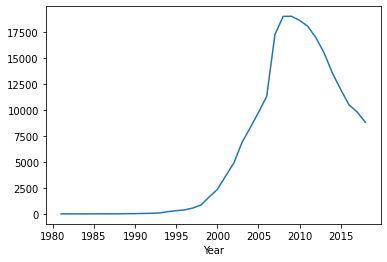

In [ ]:
names[names['Name']=='Jayden'].groupby('Year')['Count'].sum().plot.line()

In [ ]:
names[(names['Name']=='Jonathan')&(names['Year']==1983)]

,Name,Sex,Count,Year
862,Jonathan,F,177,1983
12081,Jonathan,M,22744,1983


Exercises 2-4 deal with the Movielens data set (https://dlsun.github.io/pods/data/ml-1m/ ), which contains 1 million movie ratings submitted by users. The information about the movies, ratings, and users are stored in three separate files, called `movies.dat`, `ratings.dat`, and `users.dat`. The column names are not included with the data files. Refer to the webpage above for more information.

In [ ]:
df_movies = pd.read_csv('https://dlsun.github.io/pods/data/ml-1m/movies.dat',
                        delimiter='::',encoding_errors='ignore',
                        names=['MovieID','Title','Genres'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df_ratings = pd.read_csv('https://dlsun.github.io/pods/data/ml-1m/ratings.dat',
                         delimiter='::',encoding_errors='ignore',
                         names=['UserID','MovieID','Rating','Timestamp'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df_users = pd.read_csv('https://dlsun.github.io/pods/data/ml-1m/users.dat',
                         delimiter='::',encoding_errors='ignore',
                         names=['UserID','Gender','Age','Occupation','Zip-code'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


2\. Who's more generous with ratings: males or females? Calculate the average of the ratings given by male users, and the average of the ratings given by female users.

In [ ]:
user_ratings = pd.merge(df_ratings,df_users,on='UserID')

In [ ]:
user_ratings.groupby('Gender')['Rating'].mean()

Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

3\. Among movies with at least 100 ratings, which movie had the highest average rating?

In [ ]:
movie_ratings = pd.merge(df_movies,df_ratings,on='MovieID')

In [ ]:
avg_ratings = movie_ratings.groupby('MovieID')['Rating'].mean().reset_index().rename({'Rating':'AvgRating'},axis=1)
num_ratings = movie_ratings.groupby('MovieID')['Rating'].count().reset_index().rename({'Rating':'NumRatings'},axis=1)

In [ ]:
df_movies = pd.merge(df_movies,avg_ratings,on='MovieID')
df_movies = pd.merge(df_movies,num_ratings,on='MovieID')

In [ ]:
greater_than_100_reviews = df_movies.loc[df_movies['NumRatings']>=100]
greater_than_100_reviews.loc[greater_than_100_reviews['AvgRating'].idxmax()]

MovieID                                                    2019
Title         Seven Samurai (The Magnificent Seven) (Shichin...
Genres                                             Action|Drama
AvgRating                                               4.56051
NumRatings                                                  628
Name: 1839, dtype: object

**Exercise 4.** For each movie, calculate the average age of the users who rated it and the average rating. Make a scatterplot showing the relationship between age and rating, with each point representing a movie. (Optional: Use the size of each point to represent the number of users who rated the movie.)

In [ ]:
avg_age = user_ratings.groupby('MovieID')['Age'].mean().reset_index().rename({'Age':'AvgAge'},axis=1)
avg_rating = user_ratings.groupby('MovieID')['Rating'].mean().reset_index().rename({'Rating':'AvgRating'},axis=1)

In [ ]:
df_movies = pd.merge(df_movies,avg_age,on='MovieID')

In [ ]:
from altair import *

In [ ]:
Chart(df_movies).mark_circle().encode(
    x='AvgAge',
    y='AvgRating'
)

alt.Chart(...)

In [ ]:
Chart(df_movies).mark_circle().encode(
    x='AvgAge',
    y='AvgRating',
    size='NumRatings'
)

alt.Chart(...)